# COFFEE QUALITY 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors
from dateutil import parser
from datetime import datetime

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



import re
import warnings
warnings.filterwarnings('ignore')


## | Imput and clean the Data

In [2]:
#cargo mi data
df_coffee = pd.read_csv('merged_data_cleaned.csv')

In [3]:
df_coffee.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [4]:
#check el tamaño de mi dataset
df_coffee.shape

(1339, 44)

In [5]:
df_coffee.columns=df_coffee.columns.str.lower().str.replace('.','_')


In [6]:
columnas_eliminadas = ['unnamed: 0','owner','farm_name' ,'lot_number'  , 'company'  ,'farm_name', 'mill', 'ico_number',
       'producer', 'number_of_bags', 'bag_weight', 'in_country_partner','altitude_high_meters','altitude_low_meters', 
        'grading_date', 'owner_1', 'variety', 'certification_body','altitude_mean_meters',
       'certification_address', 'certification_contact', 'unit_of_measurement'] 

In [7]:
df_coffee= df_coffee.drop(columnas_eliminadas,axis=1)
df_coffee.head()

,species,country_of_origin,altitude,region,harvest_year,processing_method,aroma,flavor,aftertaste,acidity,...,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration
0,Arabica,Ethiopia,1950-2200,guji-hambela,2014,Washed / Wet,8.67,8.83,8.67,8.75,...,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016"
1,Arabica,Ethiopia,1950-2200,guji-hambela,2014,Washed / Wet,8.75,8.67,8.50,8.58,...,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016"
2,Arabica,Guatemala,1600 - 1800 m,NaN,NaN,NaN,8.42,8.50,8.42,8.42,...,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011"
3,Arabica,Ethiopia,1800-2200,oromia,2014,Natural / Dry,8.17,8.58,8.42,8.42,...,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016"
4,Arabica,Ethiopia,1950-2200,guji-hambela,2014,Washed / Wet,8.25,8.50,8.25,8.50,...,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016"


## | Missing Values

In [8]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   species               1339 non-null   object 
 1   country_of_origin     1338 non-null   object 
 2   altitude              1113 non-null   object 
 3   region                1280 non-null   object 
 4   harvest_year          1292 non-null   object 
 5   processing_method     1169 non-null   object 
 6   aroma                 1339 non-null   float64
 7   flavor                1339 non-null   float64
 8   aftertaste            1339 non-null   float64
 9   acidity               1339 non-null   float64
 10  body                  1339 non-null   float64
 11  balance               1339 non-null   float64
 12  uniformity            1339 non-null   float64
 13  clean_cup             1339 non-null   float64
 14  sweetness             1339 non-null   float64
 15  cupper_points        

In [9]:
##trabajamos nulos
df_coffee.isnull().sum()

species                   0
country_of_origin         1
altitude                226
region                   59
harvest_year             47
processing_method       170
aroma                     0
flavor                    0
aftertaste                0
acidity                   0
body                      0
balance                   0
uniformity                0
clean_cup                 0
sweetness                 0
cupper_points             0
total_cup_points          0
moisture                  0
category_one_defects      0
quakers                   1
color                   218
category_two_defects      0
expiration                0
dtype: int64

In [10]:
# Replacing values
df_coffee['color'][df_coffee['color'].isna()] = 'None'

In [11]:
# Checking missing value in Quakers
df_coffee[df_coffee.quakers.isna()]

,species,country_of_origin,altitude,region,harvest_year,processing_method,aroma,flavor,aftertaste,acidity,...,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration
366,Arabica,Colombia,1750 msnm,huila,2013,Washed / Wet,7.58,7.67,7.58,7.75,...,10.0,10.0,7.58,83.5,0.11,0,NaN,Green,2,"May 24th, 2014"


In [12]:
# Checking Quakers
df_coffee['quakers'].value_counts()

0.0     1244
1.0       39
2.0       30
4.0        5
5.0        5
3.0        5
6.0        4
7.0        3
11.0       1
9.0        1
8.0        1
Name: quakers, dtype: int64

In [13]:
# Replacing NaN by 0, the mode of the variable. 
df_coffee['quakers'][df_coffee.quakers.isna()] = 0

## | Uniform Date

In [14]:
# Checking Harvest year
df_coffee['harvest_year'].value_counts()

2012                        354
2014                        233
2013                        181
2015                        129
2016                        124
2017                         70
2013/2014                    29
2015/2016                    28
2011                         26
2017 / 2018                  19
2014/2015                    19
2009/2010                    12
2010                         10
2010-2011                     6
2016 / 2017                   6
4T/10                         4
March 2010                    3
2009-2010                     3
Mayo a Julio                  3
4T/2010                       3
Abril - Julio                 2
January 2011                  2
2011/2012                     2
08/09 crop                    2
December 2009-March 2010      1
TEST                          1
4T72010                       1
2018                          1
1t/2011                       1
2016/2017                     1
3T/2011                       1
Spring 2

In [15]:
# Replacing NaN values by Unknown
df_coffee['harvest_year'][df_coffee['harvest_year'].isna()] = 'Unknown'

In [16]:
# Replacing values
harvest = []
for i in df_coffee['harvest_year']:
    if re.search("[2][0]\d\d", i):
        year = re.search("[2][0]\d\d", i).group()
        harvest.append(year)
    elif re.search("\d\d", i):
        aux = re.search('\d\d', i).group()
        year = '20'+aux
        harvest.append(year)
    else:
        harvest.append('2010')

df_coffee['harvest_year'] = harvest

In [17]:
df_coffee['harvest_year'].value_counts()

2012    354
2014    252
2013    210
2015    157
2016    131
2017     89
2010     87
2011     36
2009     20
2008      2
2018      1
Name: harvest_year, dtype: int64

In [18]:
 df_coffee[df_coffee['country_of_origin'].isna()]

,species,country_of_origin,altitude,region,harvest_year,processing_method,aroma,flavor,aftertaste,acidity,...,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration
1197,Arabica,NaN,NaN,NaN,2010,NaN,6.75,6.75,6.42,6.83,...,10.0,10.0,7.25,79.08,0.1,0,0.0,None,3,"February 29th, 2012"


In [19]:
# There are a lot of missing values in this observation, it'll be dropped. 
df_coffee.drop(index = 1197, inplace = True)

In [20]:
# These NaN will be replaced by Unknown.
df_coffee['region'][df_coffee['region'].isna()] = 'Unknown'

In [21]:
df_coffee[df_coffee.altitude.isna()]

,species,country_of_origin,altitude,region,harvest_year,processing_method,aroma,flavor,aftertaste,acidity,...,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration
5,Arabica,Brazil,NaN,Unknown,2013,Natural / Dry,8.58,8.42,8.42,8.50,...,10.00,10.00,8.33,88.83,0.11,0,0.0,Bluish-Green,1,"September 3rd, 2014"
6,Arabica,Peru,NaN,Unknown,2012,Washed / Wet,8.42,8.50,8.33,8.50,...,10.00,10.00,8.50,88.75,0.11,0,0.0,Bluish-Green,0,"September 17th, 2013"
17,Arabica,Ethiopia,NaN,yirgacheffe,2009,NaN,8.17,8.33,8.25,8.33,...,10.00,9.33,8.83,87.33,0.05,0,0.0,None,2,"June 16th, 2011"
24,Arabica,Ethiopia,NaN,sidamo,2013,Natural / Dry,8.42,8.17,7.92,8.17,...,10.00,10.00,8.08,87.08,0.11,0,0.0,Bluish-Green,1,"September 3rd, 2014"
26,Arabica,Ethiopia,NaN,sidamo,2009,NaN,7.83,8.25,8.08,8.17,...,10.00,10.00,8.25,86.92,0.05,0,0.0,None,2,"June 16th, 2011"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,Arabica,United States (Hawaii),NaN,kona,2014,Natural / Dry,6.92,6.92,6.92,7.50,...,6.67,9.33,6.92,72.58,0.11,5,0.0,Green,9,"March 10th, 2015"
1302,Arabica,Brazil,NaN,cerrado,2017,Natural / Dry,7.00,7.00,6.83,7.00,...,6.00,10.00,6.67,70.67,0.11,0,1.0,Green,55,"October 27th, 2018"
1334,Robusta,Ecuador,NaN,"san juan, playas",2016,NaN,7.75,7.58,7.33,7.58,...,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017"
1337,Robusta,India,NaN,Unknown,2013,Natural / Dry,7.42,6.83,6.75,7.17,...,9.33,7.08,6.92,75.08,0.10,20,0.0,Green,1,"August 25th, 2015"


In [22]:
def clean_altitude_range(range_value):
    if isinstance(range_value, str):
        range_value = range_value.replace(" ", "")  # Remove blank spaces
        if '-' in range_value:
            try:
                start, end = range_value.split('-')
                start = int(start)
                end = int(end)
                return (start + end) / 2
            except ValueError:
                return np.nan
        else:
            try:
                return int(range_value)
            except ValueError:
                return np.nan
    else:
        return range_value


In [23]:
# Apply the function to clean and calculate the mean for each value in the "Altitude" column
df_coffee['altitude'] = df_coffee['altitude'].apply(clean_altitude_range)

In [24]:
df_coffee['altitude'].mean()

1855.4904831625183

In [25]:
# Replacing values
df_coffee['altitude'][df_coffee['altitude'].isna()] = '1855'

In [26]:
# Checking processing method
df_coffee['processing_method'].value_counts()

Washed / Wet                 815
Natural / Dry                258
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: processing_method, dtype: int64

In [27]:
# Replacing values
df_coffee['processing_method'][df_coffee['processing_method'].isna()] = 'Other'

In [28]:
df_coffee.head()

,species,country_of_origin,altitude,region,harvest_year,processing_method,aroma,flavor,aftertaste,acidity,...,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration
0,Arabica,Ethiopia,2075.0,guji-hambela,2014,Washed / Wet,8.67,8.83,8.67,8.75,...,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016"
1,Arabica,Ethiopia,2075.0,guji-hambela,2014,Washed / Wet,8.75,8.67,8.50,8.58,...,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016"
2,Arabica,Guatemala,1855,Unknown,2010,Other,8.42,8.50,8.42,8.42,...,10.0,10.0,9.25,89.75,0.00,0,0.0,None,0,"May 31st, 2011"
3,Arabica,Ethiopia,2000.0,oromia,2014,Natural / Dry,8.17,8.58,8.42,8.42,...,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016"
4,Arabica,Ethiopia,2075.0,guji-hambela,2014,Washed / Wet,8.25,8.50,8.25,8.50,...,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016"


##  | Completeness

In [29]:
#check unique region
df_coffee.country_of_origin.unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', 'India'], dtype=object)

In [30]:
df_coffee['country_of_origin'][df_coffee['country_of_origin'] == 'Cote d?Ivoire'] = "Cote d'Ivoire"

In [31]:
df_coffee['country_of_origin'][df_coffee['country_of_origin'] == 'Tanzania, United Republic Of'] = 'Tanzania'

In [32]:
# Replacing the country of origin
df_coffee['country_of_origin'][df_coffee['region'] == 'antioquia'] = 'Colombia'
df_coffee['country_of_origin'][df_coffee['region'] == 'berastagi'] = 'Indonesia'
df_coffee['country_of_origin'][df_coffee['region'] == 'chikmagalur'] = 'India'
df_coffee['country_of_origin'][df_coffee['region'] == 'kwanza norte province, angola'] = 'Angola'

# Fase 2

In [33]:
# Convert "Harvest Year" and "Expiration" columns to datetime objects using dateutil parser
df_coffee['harvest_year'] = pd.to_datetime(df_coffee['harvest_year'], format='%Y')

In [34]:
df_coffee['expiration'] = df_coffee['expiration'].apply(parser.parse)

In [42]:
#creo mi archivo limpio
df_coffee.to_csv('datac_coffee.csv', index=False)

## | Analysis

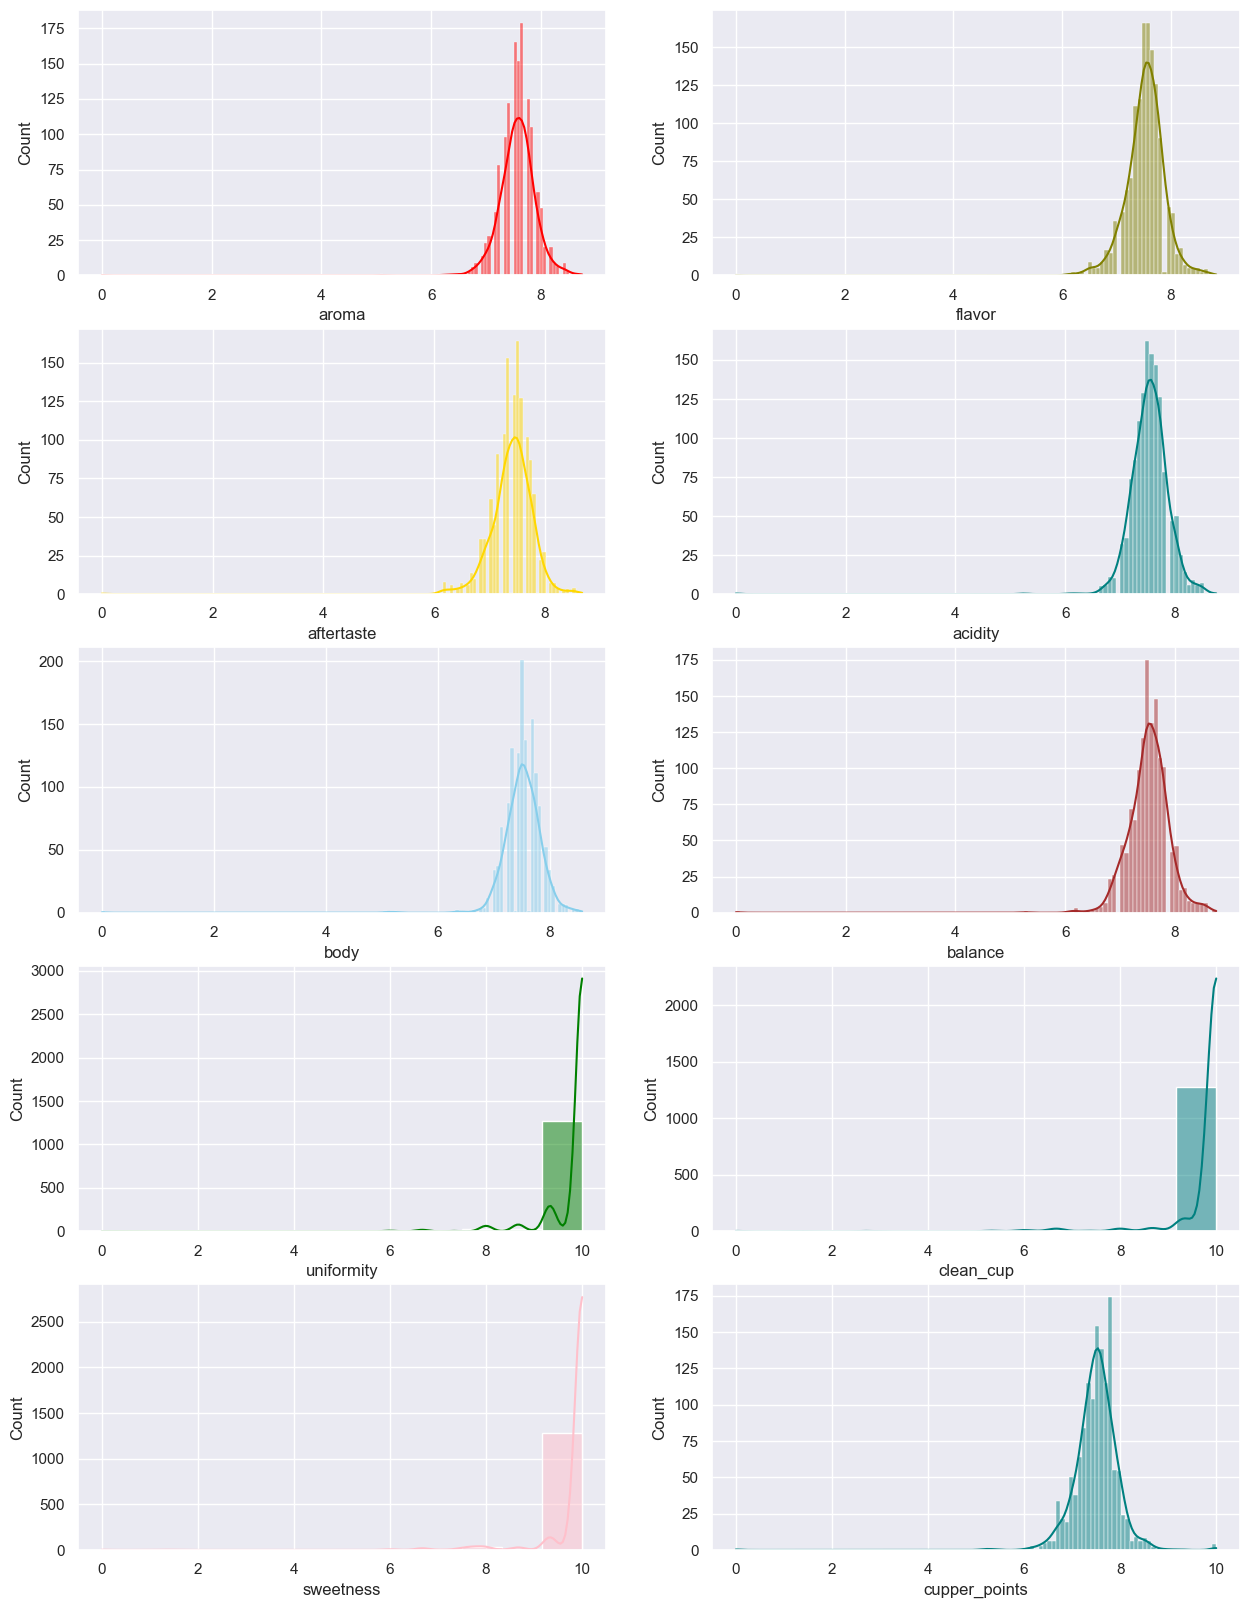

In [49]:
sns.set(style='darkgrid')

fig,axs = plt.subplots(5, 2, figsize=(15, 20))


sns.histplot(data=df_coffee, x="aroma", kde=True, color="red", ax=axs[0, 0])
sns.histplot(data=df_coffee, x="flavor", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_coffee, x="acidity", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df_coffee, x="body", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df_coffee, x="balance", kde=True, color="brown", ax=axs[2, 1])
sns.histplot(data=df_coffee, x="aftertaste", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_coffee, x="uniformity", kde=True, color="green", ax=axs[3, 0])
sns.histplot(data=df_coffee, x="clean_cup", kde=True, color="teal", ax=axs[3, 1])
sns.histplot(data=df_coffee, x="sweetness", kde=True, color="pink", ax=axs[4, 0])
sns.histplot(data=df_coffee, x="cupper_points", kde=True, color="teal", ax=axs[4, 1])
plt.show()

# | GEOSPATIAL ANALYSIS

In [50]:
# Group the data by country and calculate the mean of Total Cup Points
df_grouped = df_coffee.groupby('country_of_origin')['total_cup_points'].mean().reset_index()

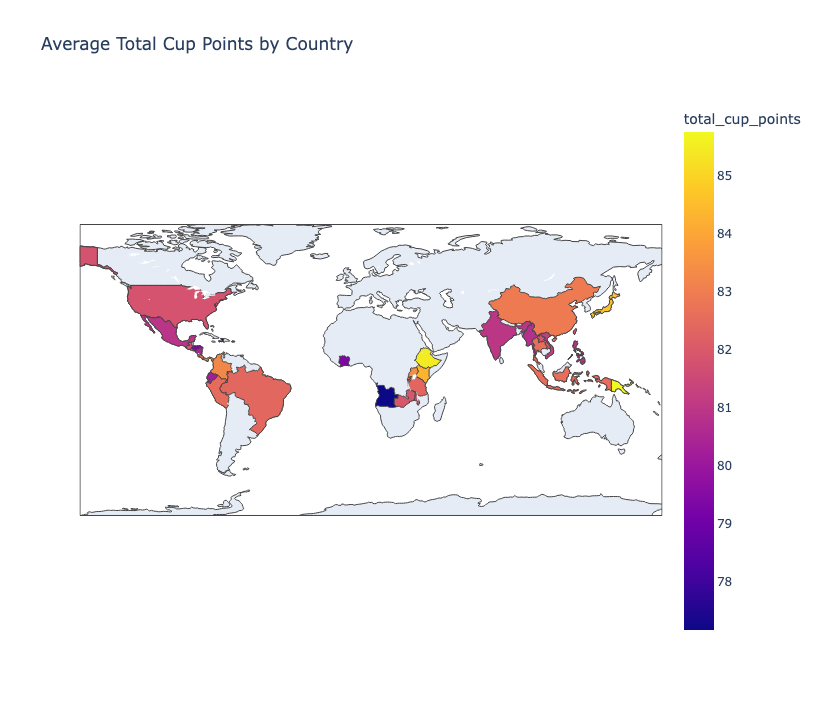

In [43]:
# Create a Choropleth map
fig1 = px.choropleth(df_grouped, 
                    locations='country_of_origin', 
                    locationmode='country names',
                    color='total_cup_points',
                    hover_name='country_of_origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Total Cup Points by Country')
fig1.show()




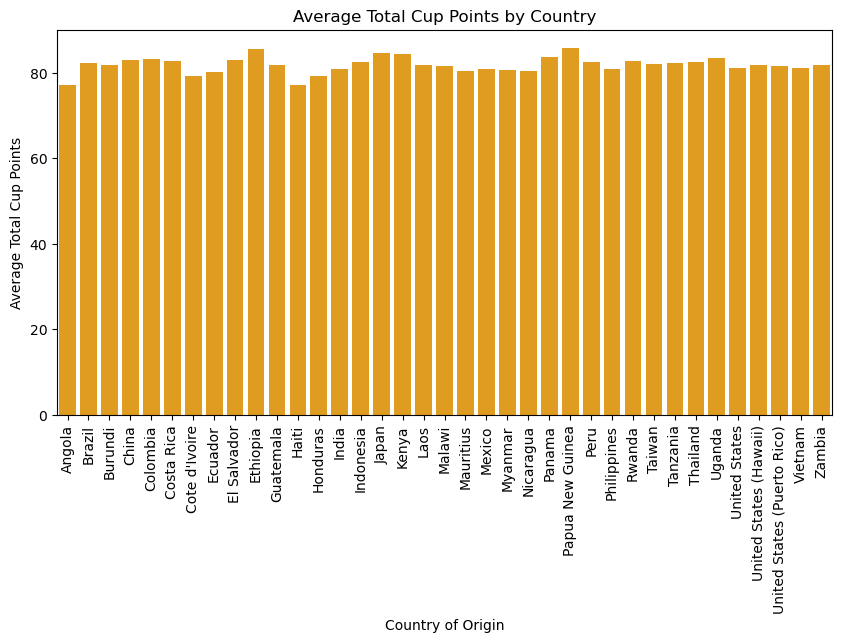

In [44]:
# Create a bar plot 
plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['country_of_origin'], y=df_grouped['total_cup_points'], color='orange')
plt.title('Average Total Cup Points by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Average Total Cup Points')
plt.xticks(rotation=90)
plt.show()


In [45]:
# Group the data by country and calculate the mean of Total Cup Points
df_grouped = df_coffee.groupby('country_of_origin')['coffee_age'].mean().reset_index()

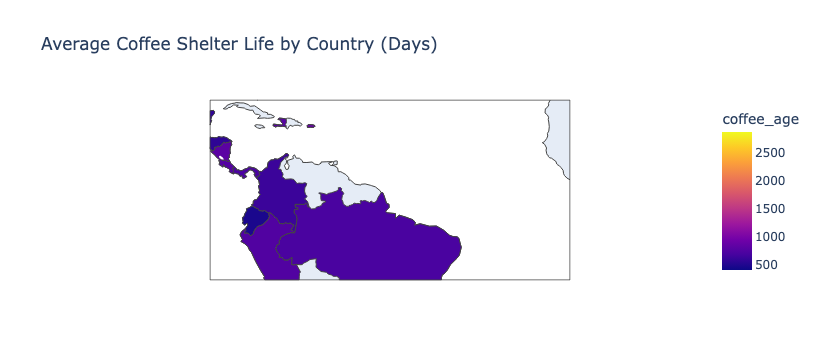

In [46]:
# Create a Choropleth map
fig = px.choropleth(df_grouped, 
                    locations='country_of_origin', 
                    locationmode='country names',
                    color='coffee_age',
                    hover_name='country_of_origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Coffee Shelter Life by Country (Days)')
fig.show()

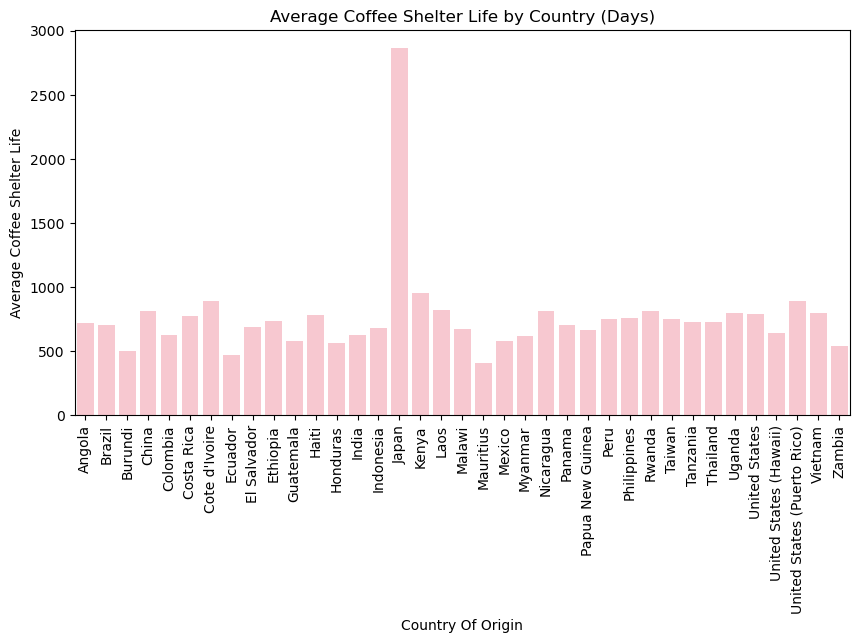

In [47]:
# Create a bar plot with gray color
plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['country_of_origin'], y=df_grouped['coffee_age'], color='Pink')
plt.title('Average Coffee Shelter Life by Country (Days)')
plt.xlabel('Country Of Origin')
plt.ylabel('Average Coffee Shelter Life')
plt.xticks(rotation=90)
plt.show()

In [48]:
# Count the unique occurrences of each country
df_count = df_coffee['country_of_origin'].value_counts().reset_index()


In [49]:
df_count.columns = ['country_of_origin', 'Count']

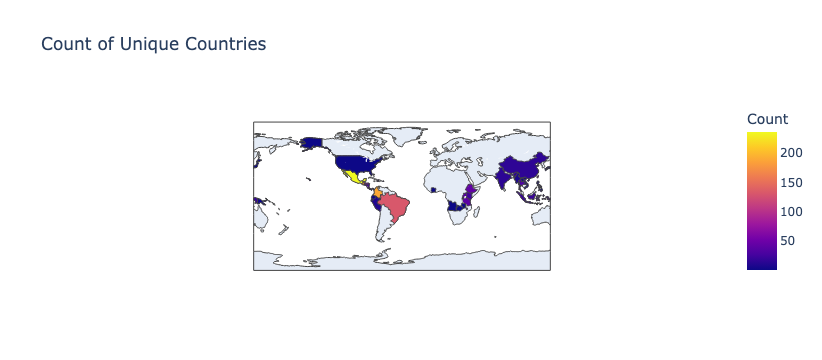

In [50]:
# Create a choropleth map
fig = px.choropleth(df_count, 
                    locations='country_of_origin', 
                    locationmode='country names',
                    color='Count',
                    hover_name='country_of_origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Count of Unique Countries')

fig.show()

In [66]:
import plotly.express as px

In [69]:
fig =px.scatter(x=range(10), y=range(10))

In [71]:
fig.write_html("coffee_data2.ipynb/to/file.html")

NotADirectoryError: [Errno 20] Not a directory: 'coffee_data2.ipynb/to/file.html'

In [68]:
!pwd

/Users/yun/Documents/IronHack/MIND_PROY_COFF


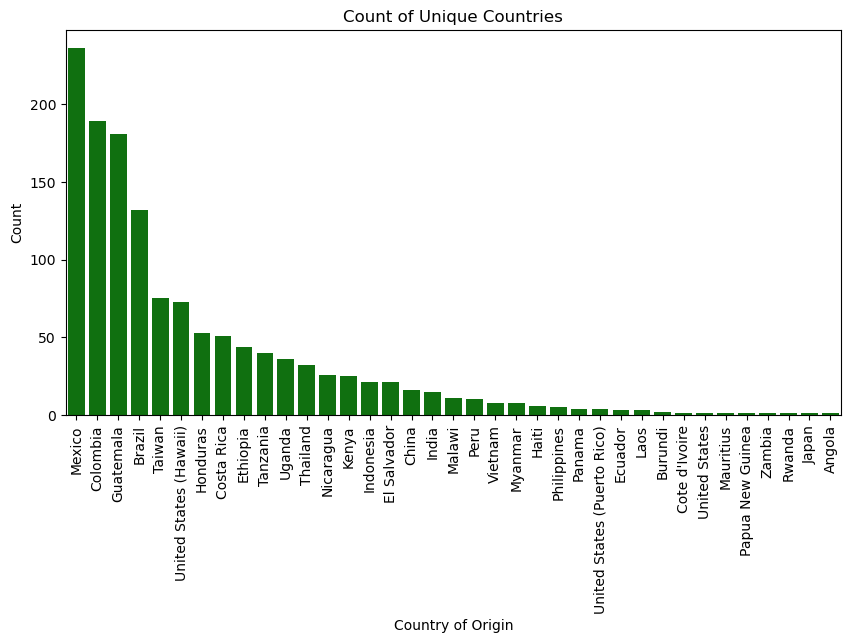

In [51]:
# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=df_count['country_of_origin'], y=df_count['Count'], color='green')
plt.title('Count of Unique Countries')
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# CORRELATION 

In [52]:
data = df_coffee.copy()

In [53]:
categorical_columns = ['processing_method']
numerical_columns = ['altitude', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'moisture','total_cup_points', 'category_one_defects', 'quakers', 'category_one_defects', 'coffee_age']
columns_to_drop = ['country_of_origin', 'color']

In [54]:
data.drop(columns_to_drop, axis=1, inplace=True)
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

In [55]:
scaler = StandardScaler()

In [56]:
# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

In [57]:
# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

## Dealing with categorical variables

##### | Create Dummy Variables

In [58]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

In [59]:
# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

##### | Corelation Matrix with dummy variables

In [60]:
correlation_matrix = processed_df.corr()

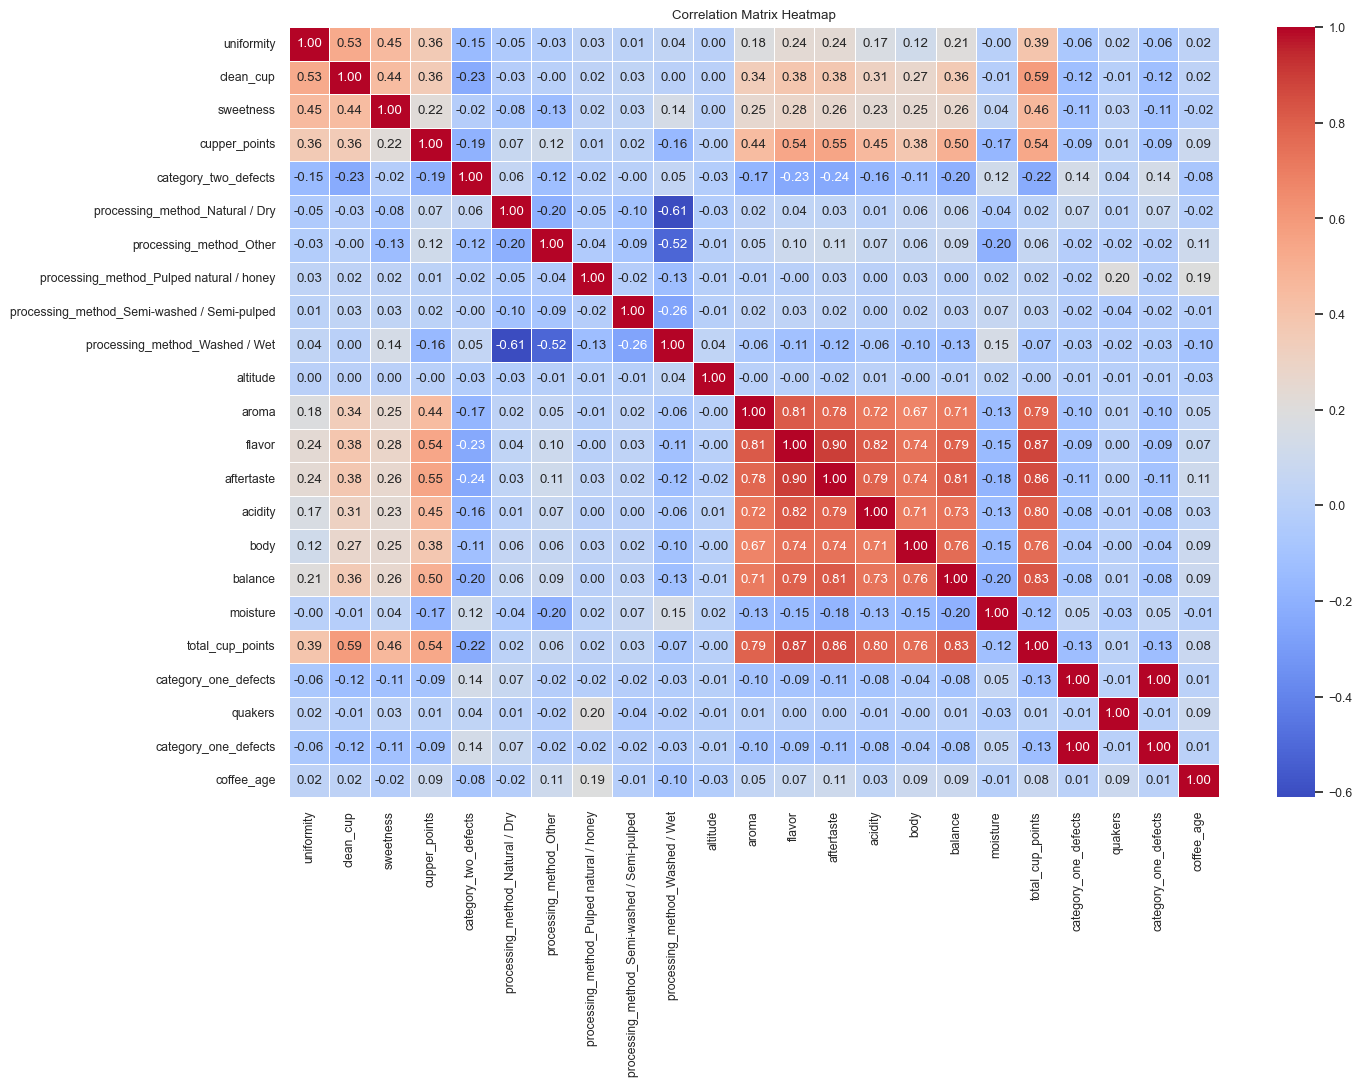

In [143]:
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [62]:
corr = processed_df.corr()

In [63]:
target_corr = corr['total_cup_points'].drop('total_cup_points')

In [64]:
# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

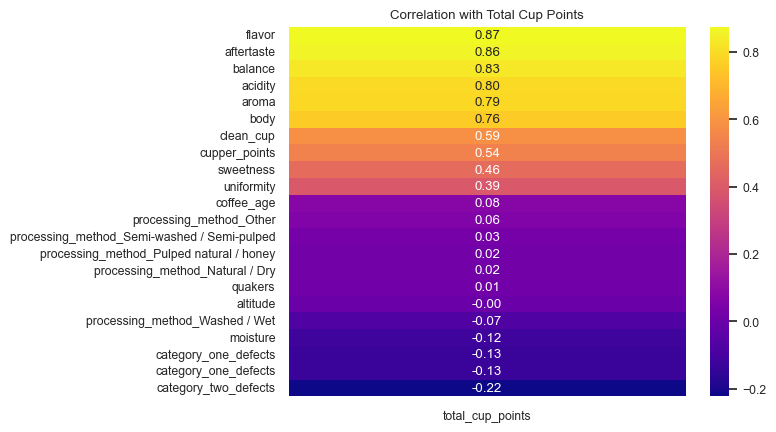

In [65]:
#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="plasma", annot=True, fmt='.2f')
plt.title('Correlation with Total Cup Points')
plt.show()

## MEXICO 

In [51]:
df_coffee[df_coffee['country_of_origin'] == 'Mexico']

,species,country_of_origin,altitude,region,harvest_year,processing_method,aroma,flavor,aftertaste,acidity,...,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration
22,Arabica,Mexico,1320.0,xalapa,2012-01-01,Washed / Wet,8.17,8.25,8.17,8.00,...,10.00,10.0,8.58,87.17,0.13,0,0.0,Green,0,"July 26th, 2013"
99,Arabica,Mexico,1300.0,veracruz,2015-01-01,Washed / Wet,7.83,8.00,7.83,7.75,...,10.00,10.0,8.08,85.00,0.09,0,0.0,Green,3,"September 21st, 2017"
103,Arabica,Mexico,1855,mexico,2010-01-01,Other,7.92,8.17,7.75,8.08,...,10.00,10.0,7.83,85.00,0.00,0,0.0,None,0,"April 5th, 2012"
111,Arabica,Mexico,1200.0,coatepec,2012-01-01,Semi-washed / Semi-pulped,7.75,8.00,7.75,7.83,...,10.00,10.0,8.17,84.92,0.11,0,0.0,None,0,"July 11th, 2013"
140,Arabica,Mexico,1200.0,el remudadero,2012-01-01,Washed / Wet,7.83,7.58,7.67,7.92,...,10.00,10.0,7.92,84.67,0.13,0,0.0,None,3,"July 2nd, 2013"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,Arabica,Mexico,1855,sierra alta mixe y zapoteca,2014-01-01,Washed / Wet,7.08,7.08,6.92,7.08,...,8.00,8.0,6.92,72.92,0.00,1,0.0,None,1,"May 8th, 2015"
1299,Arabica,Mexico,800.0,tlatlauquitepec,2012-01-01,Washed / Wet,6.92,6.92,6.92,6.92,...,2.67,10.0,6.58,71.08,0.12,4,0.0,Green,24,"September 10th, 2013"
1300,Arabica,Mexico,1800.0,veracruz,2012-01-01,Washed / Wet,6.50,6.67,6.42,7.17,...,6.00,10.0,6.42,71.00,0.11,0,0.0,Green,0,"July 11th, 2013"
1301,Arabica,Mexico,1855,"sierra norte yajalon, chiapas",2014-01-01,Washed / Wet,6.92,7.00,6.83,6.92,...,6.00,10.0,6.75,70.75,0.12,0,0.0,Green,1,"May 5th, 2015"


In [52]:
df_coffeemex=df_coffee[df_coffee['country_of_origin'] == 'Mexico']

In [53]:
df_coffeemex['region'].value_counts()

veracruz               35
coatepec               14
chiapas                13
zaragoza itundujia     12
la concordia           12
                       ..
temaxcalapa             1
manzanillo              1
siltepec el triunfo     1
san fernando            1
juchique de ferrer      1
Name: region, Length: 92, dtype: int64

In [55]:
df_coffeemex[['total_cup_points', 'region']].groupby('region').mean().sort_values(by = 'total_cup_points', 
                                                                                              ascending =False)

,total_cup_points
region,
el remudadero,84.670
hustusco,84.500
santo domingo cacalotepec,84.080
la yerbabuena,83.920
mexico,83.835
...,...
"chocaman, veracruz",74.330
sierra alta mixe y zapoteca,72.920
tlatlauquitepec,71.080


In [56]:
# Replacing the country of origin
df_coffeemex['region'][df_coffeemex['region'] == 'el remudadero'] = 'Colima'
df_coffeemex['region'][df_coffeemex['region'] == 'santo domingo cacalotepec'] = 'Oaxaca'
df_coffeemex['region'][df_coffeemex['region'] == 'la yerbabuena'] = 'Colima'
df_coffeemex['region'][df_coffeemex['region'] == 'hustusco'] = 'Veracruz'
df_coffeemex['region'][df_coffeemex['region'] == 'totutla'] = 'Veracruz'
df_coffeemex['region'][df_coffeemex['region'] == 'san pedro cotzilnam'] = 'Chiapas'
df_coffeemex['region'][df_coffeemex['region'] == 'san isidro'] = 'Oaxaca'
df_coffeemex['region'][df_coffeemex['region'] == 'mexico' ] = 'Oaxaca'
df_coffeemex['region'][df_coffeemex['region'] == 'cuarenteño ' ] = 'Nayarit'

In [57]:
top = df_coffeemex[['total_cup_points', 'region']].groupby('region').mean().sort_values(by = 'total_cup_points', 
                                                                                              ascending =False).head(10)

In [58]:
print(top)

                        total_cup_points
region                                  
Colima                            84.295
Veracruz                          84.000
Oaxaca                            83.730
nayarit                           83.380
Chiapas                           83.335
tlanchinol, hidalgo               83.170
cuarenteño                        83.085
la cumbre                         82.920
santa catarina juquila            82.705
mahuixtlan                        82.670


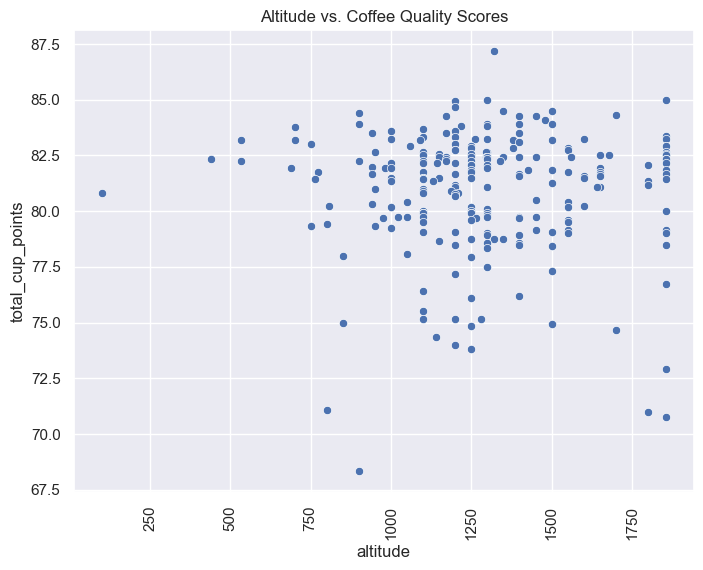

In [59]:
# Generate a scatter plot of altitude vs. coffee quality scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='altitude', y='total_cup_points', data=df_coffeemex)
plt.xlabel('altitude')
plt.ylabel('total_cup_points')
plt.title('Altitude vs. Coffee Quality Scores')
plt.xticks(rotation=90)
plt.show()

In [60]:

df_coffee[['total_cup_points', 'country_of_origin']].groupby('country_of_origin').mean().sort_values(by = 'total_cup_points', 
                                                                                              ascending =False)

,total_cup_points
country_of_origin,
Papua New Guinea,85.750000
Ethiopia,85.484091
Japan,84.670000
Kenya,84.309600
Panama,83.707500
Uganda,83.451944
Colombia,83.240317
El Salvador,83.052857
China,82.927500


In [61]:
top_t = df_coffee[['total_cup_points', 'country_of_origin']].groupby('country_of_origin').mean().sort_values(by = 'total_cup_points', 
                                                                                              ascending =False).head(10)

In [62]:
print(top_t)

                   total_cup_points
country_of_origin                  
Papua New Guinea          85.750000
Ethiopia                  85.484091
Japan                     84.670000
Kenya                     84.309600
Panama                    83.707500
Uganda                    83.451944
Colombia                  83.240317
El Salvador               83.052857
China                     82.927500
Rwanda                    82.830000


In [65]:
# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_t['country_of_origin'], y=top_t['total_cup_points'], color='green')
plt.title('Count of Unique Countries')
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

KeyError: 'country_of_origin'

<Figure size 1000x500 with 0 Axes>

In [63]:
df_coffee.to_csv('datosmex.csv', index=False)